import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import r2_score

df = pd.read_csv("Equity_Apartments_Data.csv")

print(df.info(), df.describe())

In [4]:
#Renaming Erroneously Titled Variable

df.rename(columns = {'Estiamted_Vacancy':'Estimated_Vacancy'}, inplace = True)

In [3]:
df.head()

,id,Price,Beds,Baths,sq.ft,Floor,Move_in_date,building_id,unit_id,URL,...,Fireplace,City_Skyline,Kitchen_Island,Stainless_Appliances,Renovated,Office_Space,Days_Till_Available,Day_of_the_week_recorded,Unique_ID,Estimated_Vacancy
0,432,12091,3,3.0,1797,32,9/11/21,160,32A \r\n,https://www.equityapartments.com/new-york-city...,...,0.0,0.0,0.0,0.0,0.0,0.0,56.0,Wednesday,16032A\r\n160RiversideBoulevardApartments,0.057143
1,2579,12091,3,3.0,1797,32,9/11/21,160,32A \r\n,https://www.equityapartments.com/new-york-city...,...,0.0,0.0,0.0,0.0,0.0,0.0,57.0,Monday,16032A\r\n160RiversideBoulevardApartments,0.057143
2,5354,12091,3,3.0,1797,32,9/11/21,160,32A \r\n,https://www.equityapartments.com/new-york-city...,...,0.0,0.0,0.0,0.0,0.0,0.0,58.0,Friday,16032A\r\n160RiversideBoulevardApartments,0.059341
3,8402,12091,3,3.0,1797,32,9/11/21,160,32A \r\n,https://www.equityapartments.com/new-york-city...,...,0.0,0.0,0.0,0.0,0.0,0.0,59.0,Sunday,16032A\r\n160RiversideBoulevardApartments,0.063736
4,11467,12091,3,3.0,1797,32,9/11/21,160,32A \r\n,https://www.equityapartments.com/new-york-city...,...,0.0,0.0,0.0,0.0,0.0,0.0,60.0,Saturday,16032A\r\n160RiversideBoulevardApartments,0.068132


In [4]:
df.isnull().sum()

id                             0
Price                          0
Beds                           0
Baths                          0
sq.ft                          0
Floor                          0
Move_in_date                 788
building_id                  852
unit_id                      852
URL                            0
Day_Recorded                   0
Amenity                     2491
Apartment Name                 0
Address                        0
City                           0
Units                          0
Northern_Exposure           2491
Southern_Exposure           2491
Eastern_Exposure            2491
Western_Exposure            2491
Balcony                     2491
Walk_In_Closet              2491
Fireplace                   2491
City_Skyline                2491
Kitchen_Island              2491
Stainless_Appliances        2491
Renovated                   2491
Office_Space                2491
Days_Till_Available          788
Day_of_the_week_recorded       0
Unique_ID 

In [5]:
df['building_unit_id'] = df['building_id'] + df['unit_id']

df.head()

,id,Price,Beds,Baths,sq.ft,Floor,Move_in_date,building_id,unit_id,URL,...,City_Skyline,Kitchen_Island,Stainless_Appliances,Renovated,Office_Space,Days_Till_Available,Day_of_the_week_recorded,Unique_ID,Estimated_Vacancy,building_unit_id
0,432,12091,3,3.0,1797,32,9/11/21,160,32A \r\n,https://www.equityapartments.com/new-york-city...,...,0.0,0.0,0.0,0.0,0.0,56.0,Wednesday,16032A\r\n160RiversideBoulevardApartments,0.057143,16032A \r\n
1,2579,12091,3,3.0,1797,32,9/11/21,160,32A \r\n,https://www.equityapartments.com/new-york-city...,...,0.0,0.0,0.0,0.0,0.0,57.0,Monday,16032A\r\n160RiversideBoulevardApartments,0.057143,16032A \r\n
2,5354,12091,3,3.0,1797,32,9/11/21,160,32A \r\n,https://www.equityapartments.com/new-york-city...,...,0.0,0.0,0.0,0.0,0.0,58.0,Friday,16032A\r\n160RiversideBoulevardApartments,0.059341,16032A \r\n
3,8402,12091,3,3.0,1797,32,9/11/21,160,32A \r\n,https://www.equityapartments.com/new-york-city...,...,0.0,0.0,0.0,0.0,0.0,59.0,Sunday,16032A\r\n160RiversideBoulevardApartments,0.063736,16032A \r\n
4,11467,12091,3,3.0,1797,32,9/11/21,160,32A \r\n,https://www.equityapartments.com/new-york-city...,...,0.0,0.0,0.0,0.0,0.0,60.0,Saturday,16032A\r\n160RiversideBoulevardApartments,0.068132,16032A \r\n


In [6]:
df.drop(['id', 'Move_in_date', 'building_id', 'unit_id', 'URL', 'Day_Recorded', 'Amenity', 'Apartment Name',
         'Address', 'Northern_Exposure', 'Southern_Exposure', 'Eastern_Exposure', 'Western_Exposure',
         'Days_Till_Available', 'Day_of_the_week_recorded', 'Unique_ID', 'Stainless_Appliances'], axis=1, inplace=True)

df.head()

,Price,Beds,Baths,sq.ft,Floor,City,Units,Balcony,Walk_In_Closet,Fireplace,City_Skyline,Kitchen_Island,Renovated,Office_Space,Estimated_Vacancy,building_unit_id
0,12091,3,3.0,1797,32,New York City,455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.057143,16032A \r\n
1,12091,3,3.0,1797,32,New York City,455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.057143,16032A \r\n
2,12091,3,3.0,1797,32,New York City,455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.059341,16032A \r\n
3,12091,3,3.0,1797,32,New York City,455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.063736,16032A \r\n
4,12091,3,3.0,1797,32,New York City,455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.068132,16032A \r\n


In [7]:
df.drop_duplicates(subset='building_unit_id', keep='first', inplace=True, ignore_index=False)

print(df.info())

df.head()

# Dropping the duplicate rows cut out about 94% of the data; since most units did not see a price change over the
# duration of the recording, this was a necessary step in the analysis.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4046 entries, 0 to 62808
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Price              4046 non-null   int64  
 1   Beds               4046 non-null   int64  
 2   Baths              4046 non-null   float64
 3   sq.ft              4046 non-null   int64  
 4   Floor              4046 non-null   int64  
 5   City               4046 non-null   object 
 6   Units              4046 non-null   int64  
 7   Balcony            3871 non-null   float64
 8   Walk_In_Closet     3871 non-null   float64
 9   Fireplace          3871 non-null   float64
 10  City_Skyline       3871 non-null   float64
 11  Kitchen_Island     3871 non-null   float64
 12  Renovated          3871 non-null   float64
 13  Office_Space       3871 non-null   float64
 14  Estimated_Vacancy  4046 non-null   float64
 15  building_unit_id   4045 non-null   object 
dtypes: float64(9), int64(5)

,Price,Beds,Baths,sq.ft,Floor,City,Units,Balcony,Walk_In_Closet,Fireplace,City_Skyline,Kitchen_Island,Renovated,Office_Space,Estimated_Vacancy,building_unit_id
0,12091,3,3.0,1797,32,New York City,455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.057143,16032A \r\n
8,11964,3,2.0,1917,34,New York City,455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.074725,16034D \r\n
13,10760,2,2.0,1115,21,New York City,269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022305,121G \r\n
31,9890,2,2.0,1463,17,New York City,269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022305,117D \r\n
35,9828,3,2.5,1403,5,New York City,163,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.030675,105H \r\n


<Axes: >

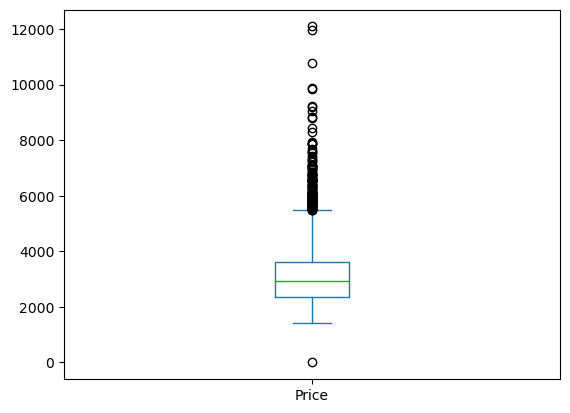

In [8]:
df['Price'].plot(kind='box')

<Axes: >

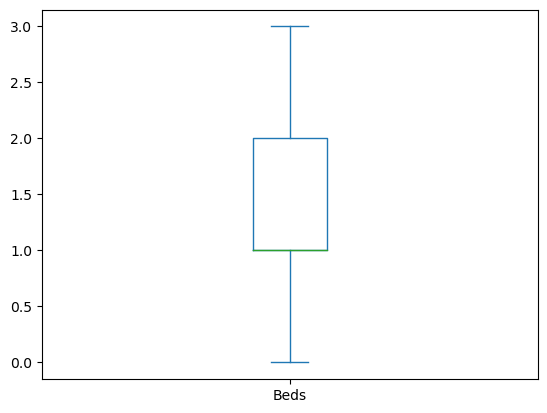

In [9]:
df['Beds'].plot(kind='box')

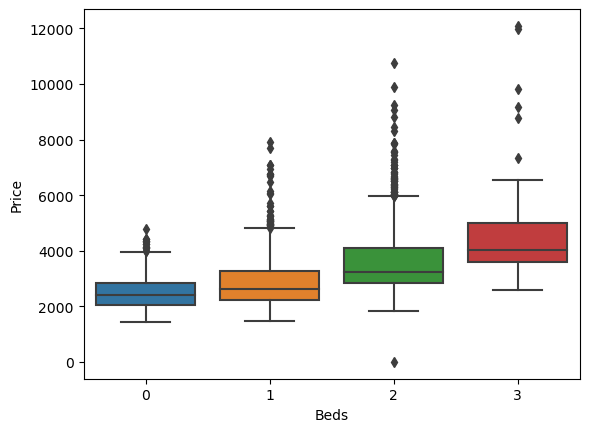

In [10]:
sns.boxplot(x=df['Beds'], y=df['Price'])
plt.show()

<Axes: >

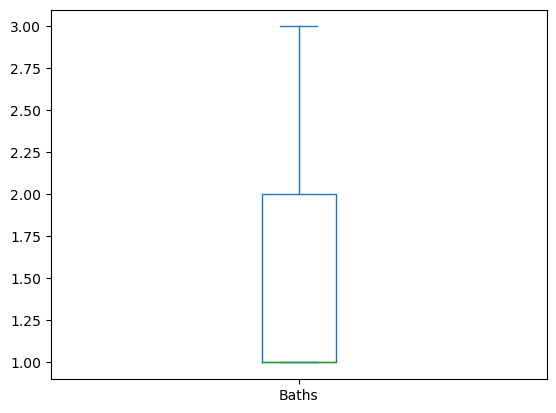

In [11]:
df['Baths'].plot(kind='box')

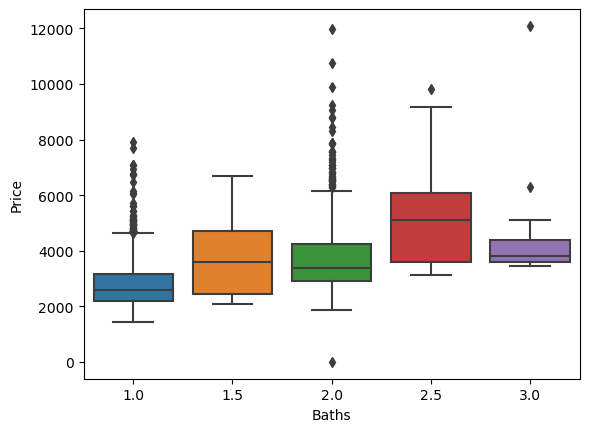

In [12]:
sns.boxplot(x=df['Baths'], y=df['Price'])
plt.show()

Text(0.5, 0, 'Floor')

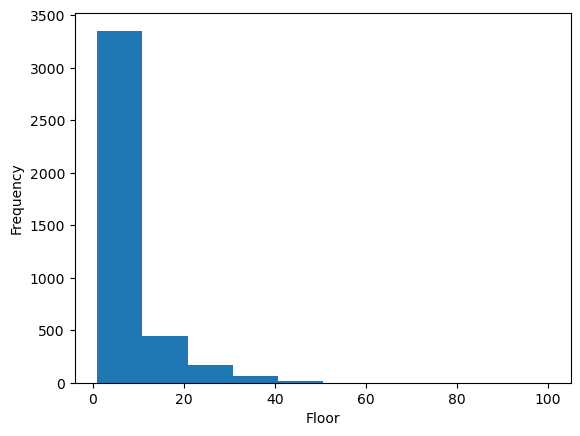

In [13]:
df['Floor'].plot(kind='hist')
plt.xlabel("Floor")

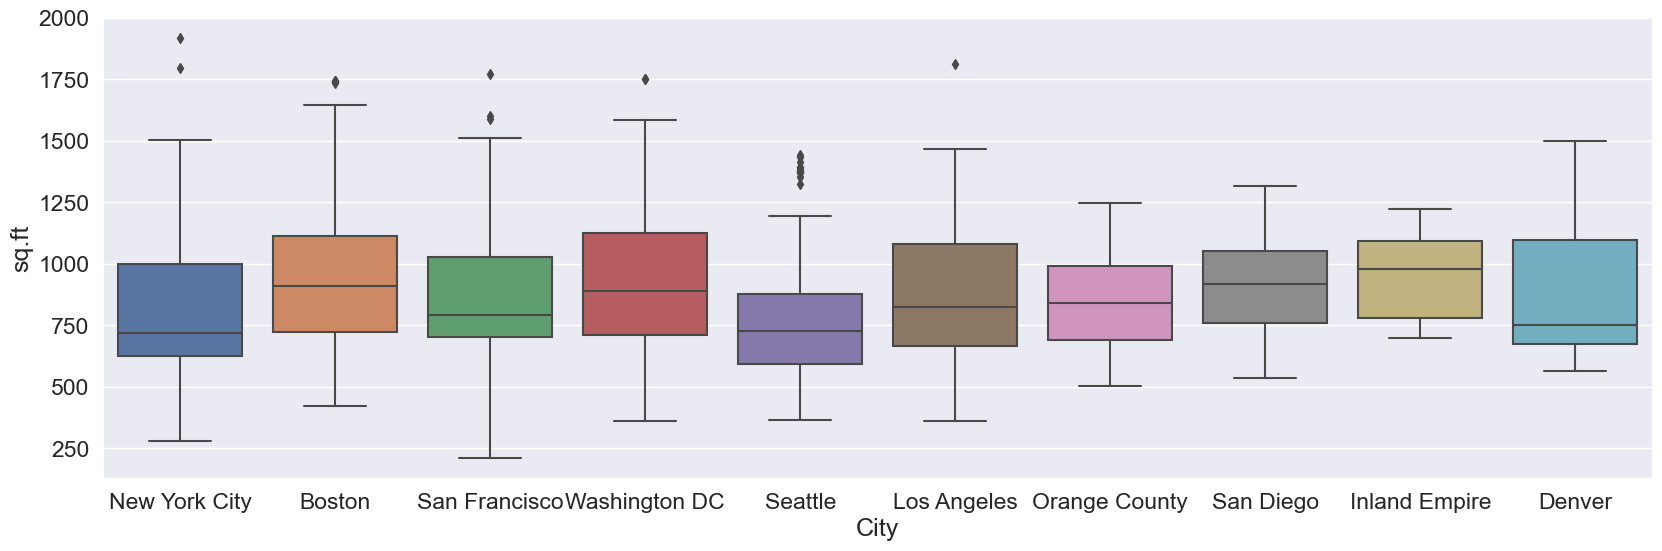

In [59]:
g = sns.boxplot(x=df['City'], y=df['sq.ft'])
sns.set(rc={'figure.figsize':(20, 6)})
sns.set(font_scale=1.5)
fmy='0.5g'
plt.show()

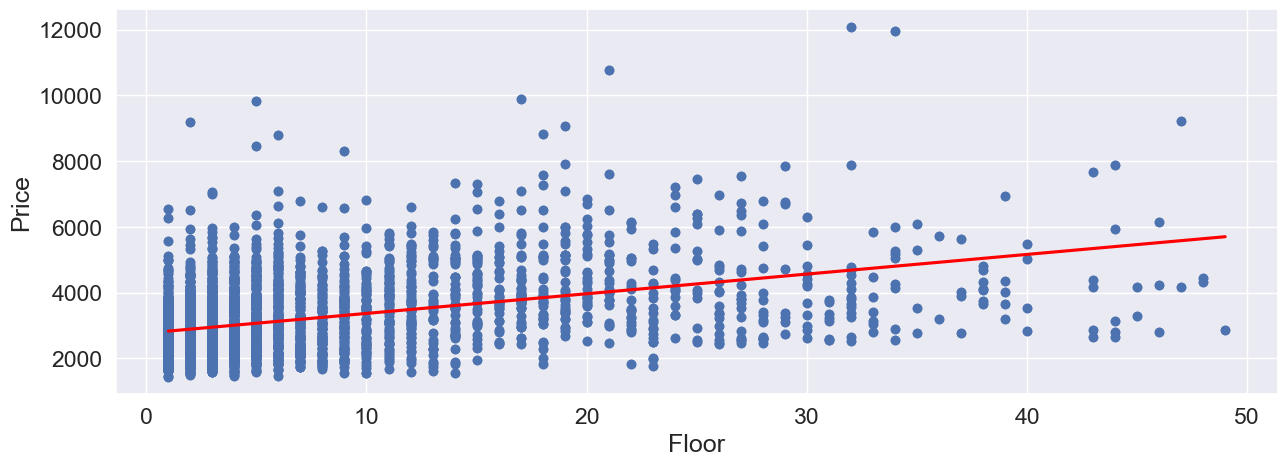

In [33]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(df["Floor"], df["Price"])
ax.set_xlabel("Floor")
ax.set_ylabel("Price")
sns.set(font_scale=1.5)
fmy='0.3g'
sns.regplot(x=df['Floor'], y=df['Price'], ci=False, line_kws={'color':'red'})
plt.show()

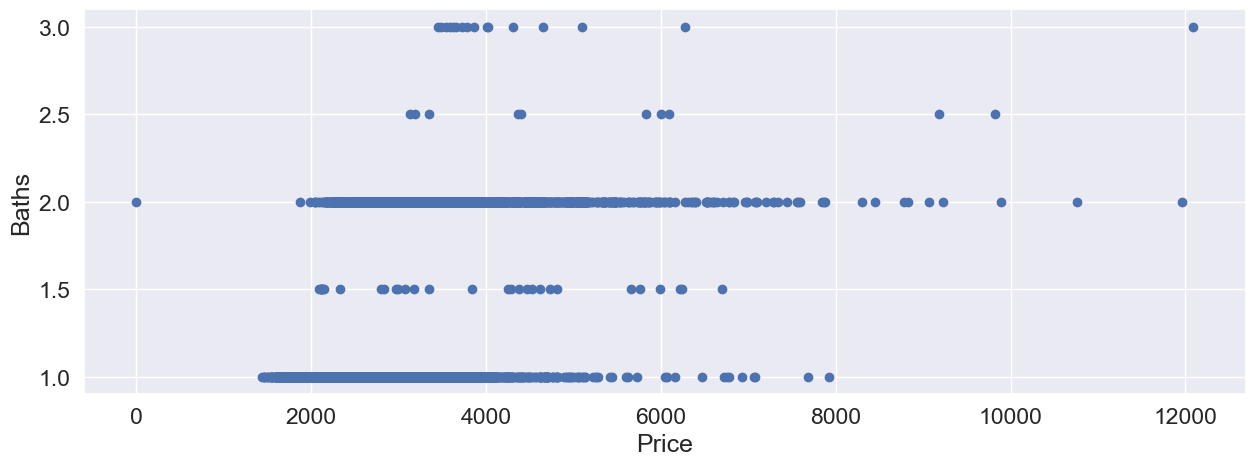

In [16]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(df["Price"], df["Baths"])
ax.set_xlabel("Price")
ax.set_ylabel("Baths")
sns.set(font_scale=1.5)
fmy='0.3g'
plt.show()

# Same as above; I'd like to show the price distribution (using a boxplot) for each number of baths

TypeError: Axes.annotate() missing 1 required positional argument: 'xy'

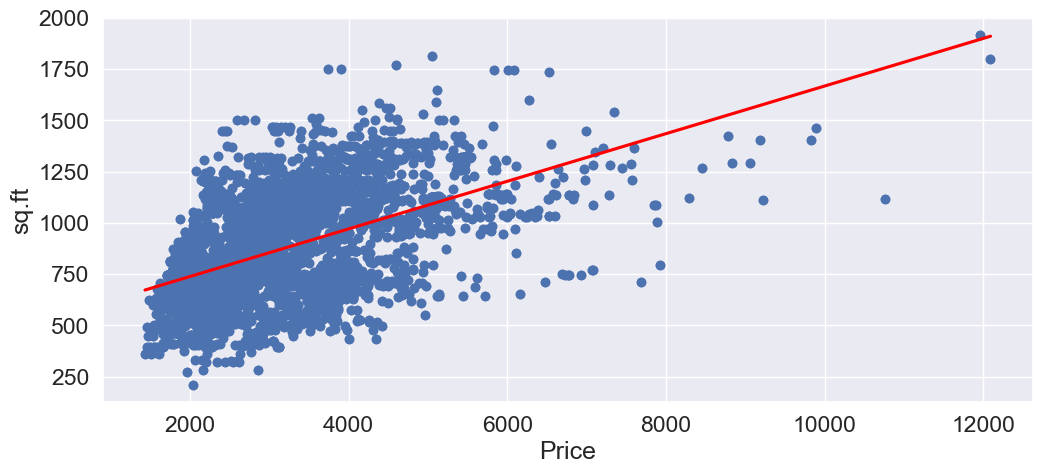

In [34]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.scatter(df["Price"], df["sq.ft"])
ax.set_xlabel("Price")
ax.set_ylabel("sq.ft")

sns.regplot(x=df['Price'], y=df['sq.ft'], ci=False, line_kws={'color':'red'})
sns.set(font_scale=1.2)
fmy='0.3g'

ax.annotate("r-squared = {0.3f}").format(r2_score(df['Price'], df['sq.ft']))
plt.show()

In [20]:
q1 = df.quantile(q=0.25, axis=0)
q3 = df.quantile(q=0.75, axis=0)
iqr = q3 - q1
print(iqr)

Price                1244.000000
Beds                    1.000000
Baths                   1.000000
sq.ft                 389.000000
Floor                   5.000000
Units                 209.000000
Balcony                 0.000000
Walk_In_Closet          0.000000
Fireplace               0.000000
City_Skyline            0.000000
Kitchen_Island          0.000000
Renovated               0.000000
Office_Space            0.000000
Estimated_Vacancy       0.033497
dtype: float64


/var/folders/_g/6hsv1grs35ndmt6n2_kk44480000gn/T/ipykernel_22519/469988821.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = df.quantile(q=0.25, axis=0)
/var/folders/_g/6hsv1grs35ndmt6n2_kk44480000gn/T/ipykernel_22519/469988821.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = df.quantile(q=0.75, axis=0)


In [21]:
lower_limit = q1 - (1.5 * iqr)
upper_limit = q3 + (1.5 * iqr)

outliers = df[((df < lower_limit) | (df > upper_limit)).any(axis=1)]

print(outliers.info())

print(df.info(), df.describe())

# There are roughly 700 outliers in each column. I will not remove the outliers here, since I believe them to be 
# true outliers and want to present an accurate depiction of the data.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2472 entries, 0 to 62808
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Price              2472 non-null   int64  
 1   Beds               2472 non-null   int64  
 2   Baths              2472 non-null   float64
 3   sq.ft              2472 non-null   int64  
 4   Floor              2472 non-null   int64  
 5   City               2472 non-null   object 
 6   Units              2472 non-null   int64  
 7   Balcony            2458 non-null   float64
 8   Walk_In_Closet     2458 non-null   float64
 9   Fireplace          2458 non-null   float64
 10  City_Skyline       2458 non-null   float64
 11  Kitchen_Island     2458 non-null   float64
 12  Renovated          2458 non-null   float64
 13  Office_Space       2458 non-null   float64
 14  Estimated_Vacancy  2472 non-null   float64
 15  building_unit_id   2471 non-null   object 
dtypes: float64(9), int64(5)

/var/folders/_g/6hsv1grs35ndmt6n2_kk44480000gn/T/ipykernel_22519/4174770730.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = df[((df < lower_limit) | (df > upper_limit)).any(axis=1)]


In [22]:
df.drop(df[df['Price'] == 0].index, inplace = True)

df.drop(df[df['Floor'] == 100].index, inplace = True)

print(df.head(4000).sort_values('Floor', ascending=False))

       Price  Beds  Baths  sq.ft  Floor           City  Units  Balcony  \
983     6042     1    1.0    620     49  New York City    302      NaN   
29560   2869     0    1.0    404     49  New York City    491      0.0   
5191    4450     2    2.0   1005     48  New York City    480      0.0   
6032    4320     2    2.0    965     48  New York City    480      0.0   
68      9230     2    2.0   1113     47  New York City    302      0.0   
...      ...   ...    ...    ...    ...            ...    ...      ...   
26251   2977     2    2.0   1050      1  Orange County    344      0.0   
26246   2977     2    2.0   1151      1  Inland Empire    467      0.0   
51687   2166     1    1.0    770      1    Los Angeles    272      0.0   
26199   2979     2    2.0   1050      1  Orange County    344      0.0   
23768   3060     2    2.0   1020      1  San Francisco    410      0.0   

       Walk_In_Closet  Fireplace  City_Skyline  Kitchen_Island  Renovated  \
983               NaN        NaN  

/var/folders/_g/6hsv1grs35ndmt6n2_kk44480000gn/T/ipykernel_22519/1555599166.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


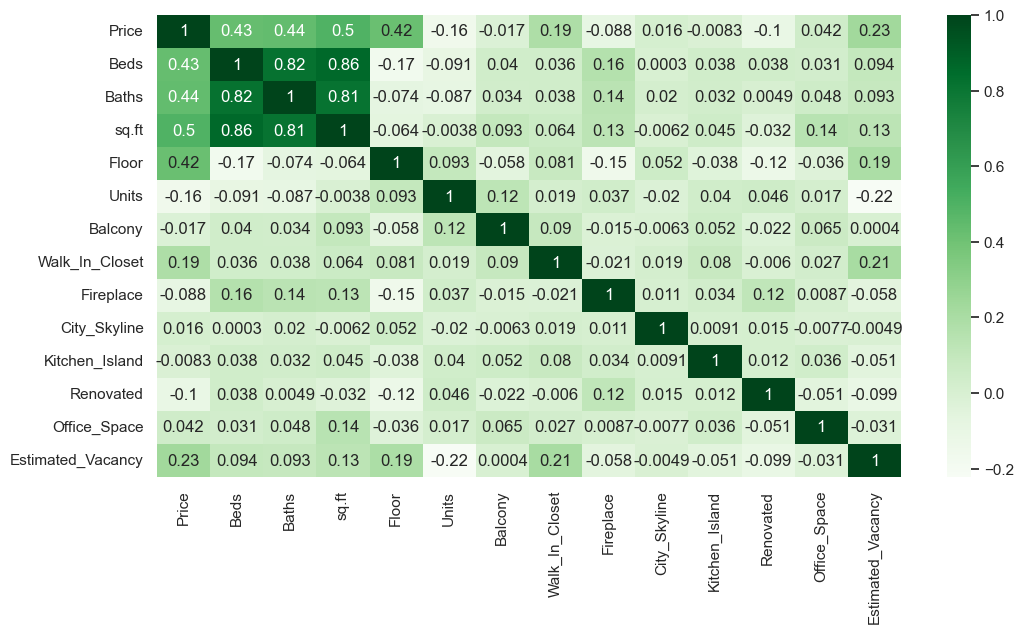

In [61]:
df.drop(df[df['Price'] == 0].index, inplace = True)
df_corr = df.corr()

fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(df_corr, annot=True, cmap='Greens')
sns.set(font_scale=1.0)
fmt='.5g'

# The four factors having the greatest influence on price (with the exception of factors not included in the analysis,
# such as location, competition, state of the market, etc.) are # of beds, # of baths, square footage, and floor
# location. Square footage has the largest effect on price, with an r value of 0.49 (a medium effect).

In [26]:
print(df_corr)

                      Price      Beds     Baths     sq.ft     Floor     Units  \
Price              1.000000  0.424900  0.435701  0.491176  0.420901 -0.155281   
Beds               0.424900  1.000000  0.819859  0.860964 -0.169664 -0.080715   
Baths              0.435701  0.819859  1.000000  0.815526 -0.074590 -0.080876   
sq.ft              0.491176  0.860964  0.815526  1.000000 -0.065429  0.006199   
Floor              0.420901 -0.169664 -0.074590 -0.065429  1.000000  0.088855   
Units             -0.155281 -0.080715 -0.080876  0.006199  0.088855  1.000000   
Balcony           -0.017465  0.039516  0.034032  0.093094 -0.057590  0.124342   
Walk_In_Closet     0.185860  0.035739  0.037584  0.063507  0.080772  0.019018   
Fireplace         -0.087587  0.164055  0.140412  0.129982 -0.150430  0.036644   
City_Skyline       0.016151  0.000304  0.019975 -0.006234  0.052254 -0.020139   
Kitchen_Island    -0.008293  0.038169  0.032369  0.045427 -0.038473  0.039569   
Renovated         -0.100206 

In [27]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

df.dropna(inplace=True)

<Axes: title={'center': 'Correlated Bar Plot'}>

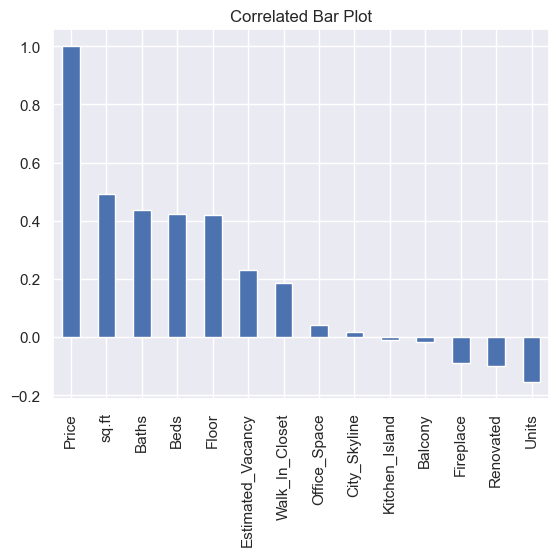

In [28]:
df_sorted = df_corr.sort_values('Price', ascending=False)

df_sorted['Price'].plot(kind='bar', title = "Correlated Bar Plot")

In [29]:
df.isna().sum()

Price                0
Beds                 0
Baths                0
sq.ft                0
Floor                0
City                 0
Units                0
Balcony              0
Walk_In_Closet       0
Fireplace            0
City_Skyline         0
Kitchen_Island       0
Renovated            0
Office_Space         0
Estimated_Vacancy    0
building_unit_id     0
dtype: int64

In [38]:
ind_var = df[['Beds', 'sq.ft', 'Floor', 'Units', 'Balcony','Walk_In_Closet',
              'Fireplace']]

dep_var = df[['Price']]

ind_var = sm.add_constant(ind_var)
regression_model = sm.OLS(dep_var, ind_var).fit()

print(regression_model.summary())


# Three variables here (Kitchen Island, Renovated, Estimated vacancy) have p-values greater
# than 0.05. We cannot surmise that these variables have a significant effect on the price of
# a unit.

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     599.5
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        10:45:14   Log-Likelihood:                -31075.
No. Observations:                3869   AIC:                         6.217e+04
Df Residuals:                    3861   BIC:                         6.222e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1377.5423     55.881     24.

<Axes: title={'center': 'Regressive Coefficients for Price'}>

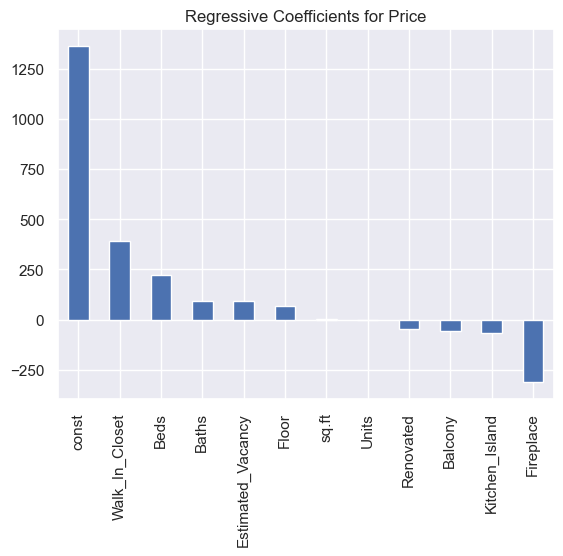

In [31]:
reg_coeff = regression_model.params.sort_values(ascending=False)
reg_coeff.plot(kind='bar', title="Regressive Coefficients for Price")


In [140]:
df.to_csv('Updated_Apartments.csv')